# **Загрузка** **Датасета**

In [ ]:
pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 65% 43.0M/66.0M [00:00<00:00, 98.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 113MB/s] 


In [ ]:
! unzip creditcardfraud

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# **Необходимые для работы библиотеки**

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression

# И**зучение начальных данных Датасета**

Прочитаем наш Датасет:
- количество категориальных переменных: 0
- колиество числовых переменных: 31
- отсутствуют NaN Значения
- убираем дубликаты: остается 283726 строк






In [ ]:
df = pd.read_csv('creditcard.csv', sep = ',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Количество категориальных переменных: {categorical_count}")
print(f"Количество числовых переменных: {numerical_count}")

Количество категориальных переменных: 0
Количество числовых переменных: 31


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

# **EDA**

Проанализируем наш Датасет:
- посмотрим основные статистические характеристики
- построим матрицу корреляций: В матрице корреляций слишком много парпаметров - невозможно получить какую-то информацию.
Построим корреляции только с целевым значением.
- для дальнейшей работы уберем параметры которые попадают в диапазон корреляций [-0.1,0.1]
- проанализируем цлевой класс Class: видиим что в нем сильный дисбаланс (283253 класса 0 и 473 класса 1), а значит нам необходимо проести балансировку данных.

In [ ]:
df.describe(include="all").T.round(2)

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.08,47481.05,0.00,54204.75,84692.50,139298.00,172792.00
V1,283726.0,0.01,1.95,-56.41,-0.92,0.02,1.32,2.45
V2,283726.0,-0.00,1.65,-72.72,-0.60,0.06,0.80,22.06
V3,283726.0,0.00,1.51,-48.33,-0.89,0.18,1.03,9.38
V4,283726.0,-0.00,1.41,-5.68,-0.85,-0.02,0.74,16.88
V5,283726.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,283726.0,-0.00,1.33,-26.16,-0.77,-0.28,0.40,73.30
V7,283726.0,0.00,1.23,-43.56,-0.55,0.04,0.57,120.59
V8,283726.0,-0.00,1.18,-73.22,-0.21,0.02,0.33,20.01
V9,283726.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


<Axes: >

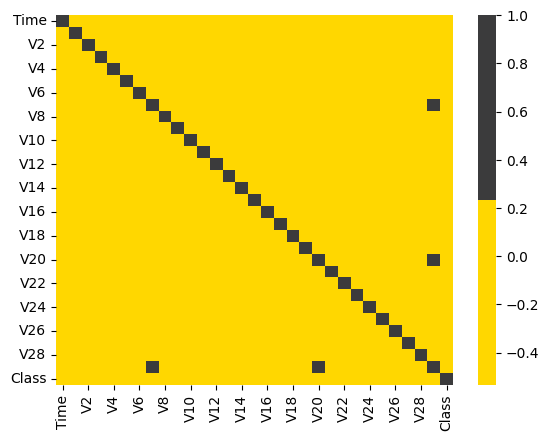

In [ ]:
colors = ['#FFD700','#3B3B3C']
sns.heatmap(df.corr(),cmap = colors,cbar = True)

В матрице корреляций слишком много парпаметров - невозможно получить какую-то информацию.
Построим корреляции только с целевым значением.

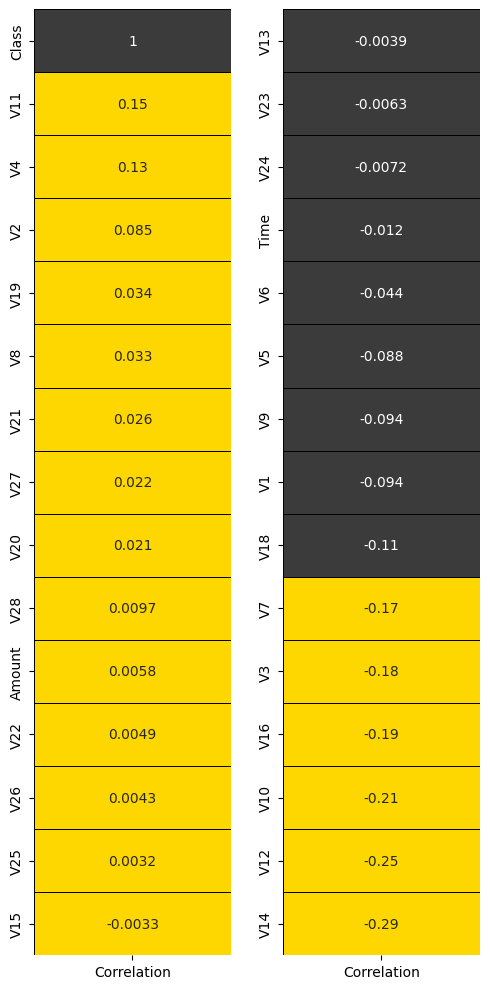

In [ ]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)

fig.tight_layout(w_pad = 2)

Посмотрим как распределяется количество транзацкий в завимимости от суммы транзакции:

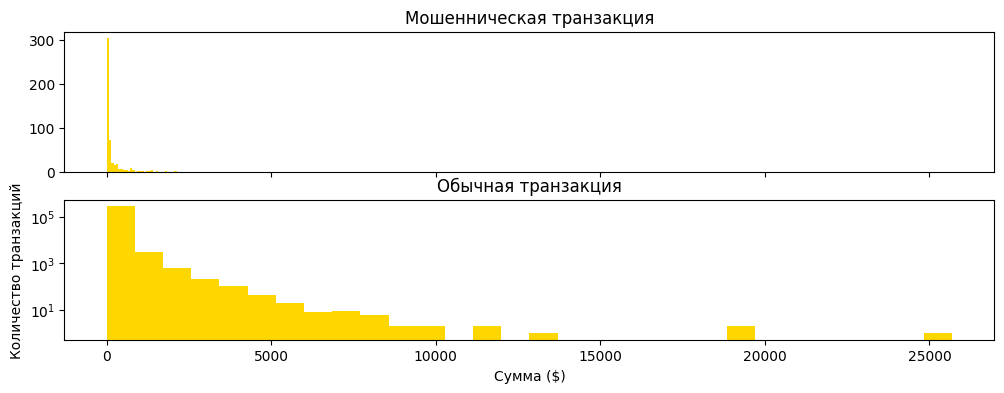

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
bins = 30

ax1.hist(df.Amount[df.Class == 1], bins=bins, color='#FFD700')
ax1.set_title('Мошенническая транзакция')

ax2.hist(df.Amount[df.Class == 0], bins=bins, color='#FFD700')
ax2.set_title('Обычная транзакция')

plt.xlabel('Сумма ($)')
plt.ylabel('Количество транзакций')

plt.yscale('log')

plt.show()

In [ ]:
df_corr = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df_corr.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [ ]:
# не забыть потом уравнять классы

df_corr['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# **Балансировка данных**

Для балансировки данных будем использовать комбинацию из oversampling и undersampling:
- проведем undersampling для основного класса
- проведем oversampling для меньшего класса
В итоге получаем распределение класса 4730/2365, что уже гораздо лучше начального распределения.

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df_corr.iloc[:,:9].values
t1 = df_corr.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4730, 1: 2365})

# **Моделирование**

Изучая материалы на kaggle пришел к выводу что лучше всего с задачей на данном Датасете справляется логистическая регрессия - ее и будем использовать.
В описании к Датафрейму сказано следующее: Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification, то есть нам предлагают использовать AUPRC для измерения точности - реализуем тогда и это измерение тоже.

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    svc_disp = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'YlOrRd',fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Cross Validation Score :  97.94%
ROC_AUC Score :  93.97%


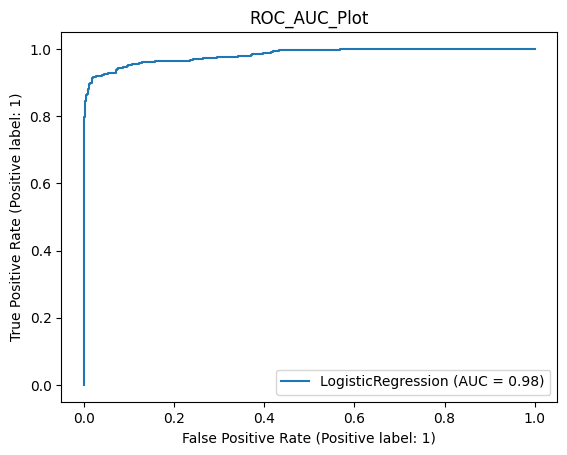

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       961
           1       0.97      0.89      0.93       458

    accuracy                           0.96      1419
   macro avg       0.96      0.94      0.95      1419
weighted avg       0.96      0.96      0.96      1419



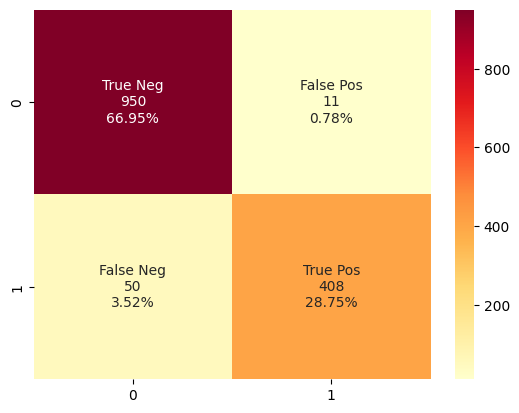

In [ ]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

# **Выводы**

Модель логистической регрессии отлично показала себя на данному Датасете - достигнута высока точность.
ROC Curve является лучшим показателем для классификатора работающего с подобным Датасетом - нотличный инструмент для работы в дальнейшем.
Так же удалось изучить новые техники визуализации данных во время работы с Датасетом - плоты, цветовые схемы, графики.
Получилось сбалансировать данные - попробовать сочетание разных методик - oversampling и undersampling.
Также познакомился с инструментом pipeline, но с ним нужно поработать еще для использованияя в будующем - очень полезный инструмент.
